# DAMA50: Mathematics for machine learning

## Written assignment 5

### Georgios Zavlanis


### Problem 7

a. First, we have to "translate" the problem into a linear programming problem. The process can be seen below:

We have 42 million dollars in total, for three types of investments.
- Let be $x_1$ for treasury notes, $x_2$ for bonds and $x_3$ for stocks.
- We have a minimum investment of 3 million dollars in each category, which means that $ x_1, x_2, x_3 \ge 3000000 $.
- Also, at least half of the total funds allocated to treasury notes and bonds, which means that $ x_1+x_2 \ge 21000000 $.
- Finally, the investment in bonds must not exceed twice the investment in treasury notes, which means that $ x_2 \le 2x_1 $ or $ x_2 - 2x_1 \le 0 $.

We need to maximize the returns, so we need max $ 0.07x_1 + 0.09x_2 + 0.1x_3 $.

b. So now, we are ready to solve the linear problem:

In [44]:
# Define the Linear Programming Problem (LP)
p=MixedIntegerLinearProgram(maximization = True)
v = p.new_variable(real=True, nonnegative = True)
x, y, z = v['x'], v['y'], v['z']

# Set the cost function
p.set_objective(0.07*x + 0.09*y + 0.1*z)

# and the constraints
p.add_constraint(x + y + z == 42000000)
p.add_constraint(x + y >= 21000000)
p.add_constraint(2*x >= y)
p.add_constraint(x >= 3000000)
p.add_constraint(y >= 3000000)
p.add_constraint(z >= 3000000)

# Solve the LP problem
p.solve()

3850000.0

In [45]:
p.get_values(x),p.get_values(y),p.get_values(z)

(7000000.0, 14000000.0, 21000000.0)

### Problem 8

First, let's create our function:

In [3]:
%display latex
x1, x2 = var('x1, x2')
f(x1, x1) = exp(x1)*(4*x1^2 + 2*x2^2 + 4*x1*x2 + 2*x2 + 1); f(x1, x1)

(4*x1^2 + 4*x1*x2 + 2*x2^2 + 2*x2 + 1)*e^x1

a. To find the stationary points using the analytically method, we follow the process below:

In [65]:
# Find the gradient. Didn't use the gradient method because didn't work properly here
gradient = [diff(f(x1, x2), x1), diff(f(x1, x2), x2)]; gradient

[0, (10*x2^2 + 2*x2 + 1)*e^x2 + 2*(10*x2 + 1)*e^x2]

In [66]:
# Set gradient equals with zero to find solutions
eq = [gradient[0] == 0, gradient[1] == 0]; eq

[0 == 0, (10*x2^2 + 2*x2 + 1)*e^x2 + 2*(10*x2 + 1)*e^x2 == 0]

In [69]:
# Solve the equation
s = solve(eq,[x1, x2]);s

[[x1 == r7, x2 == 1/10*sqrt(91) - 11/10], [x1 == r8, x2 == -1/10*sqrt(91) - 11/10]]

So, above we have the stationary points.

In [7]:
# Find the Hessian matrix:
H = f(x1,x2).hessian(); H

[(10*x2^2 + 2*x2 + 1)*e^x2 + 4*(10*x2 + 1)*e^x2 + 20*e^x2]

The Hessian matrix has only one argument

In [8]:
# Calculate the Eigenvalues
e1 = H.subs(s[0]).eigenvalues()
e2 = H.subs(s[1]).eigenvalues()

e1[0].n(), e2[0].n()


(16.4860758249642, -2.44644935957506)

So finally, we have one positive and one negative Hessian eigenvalues, and thus we have a saddle point.

b. Let's make our plot:

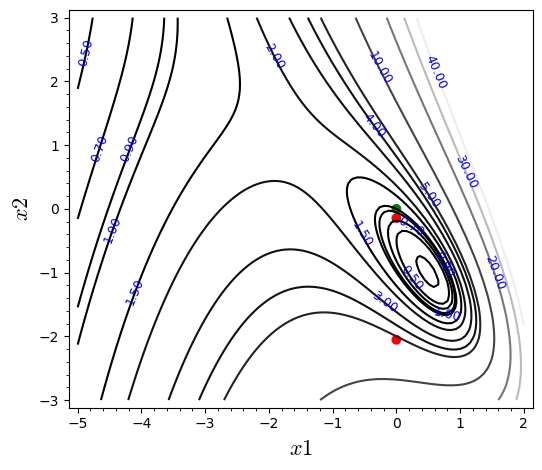

In [75]:
# if i use the f directly inside the contour plot function the plot was empty, I don't know why, so I writed again
contour_plot(exp(x1)*(4*x1^2 + 2*x2^2 + 4*x1*x2 + 2*x2 + 1),(x1,-5,2),(x2,-3,3), contours = [-1,.1,.5,.7,.9,1,1.5,2,3,4,5,10,20,30,40],\
    fill=False,labels=True,axes_labels=["$x1$","$x2$"])\
    +point((0,0),size=50,color="green")+point((0,1/10*sqrt(91)-11/10),size=50,color="red")+point((0,-1/10*sqrt(91)-11/10),size=50,color="red")

c. To solve this query we follow the steps below: